### Forecast de demanda: Facturapp

#### ✅ TimeGPT

In [33]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", FutureWarning, )

In [34]:
import pandas as pd

# Rutas a los archivos CSV
clientes_path = 'C:/Others/Emprendiendo/Agencia/Bummi ai/GitHub Bummi/forecast_facturapp/csv/clientes.csv'
productos_path = 'C:/Others/Emprendiendo/Agencia/Bummi ai/GitHub Bummi/forecast_facturapp/csv/productos.csv'
ventas_path = 'C:/Others/Emprendiendo/Agencia/Bummi ai/GitHub Bummi/forecast_facturapp/csv/ventas.csv'

# Leer los archivos CSV
clientes_df = pd.read_csv(clientes_path)
productos_df = pd.read_csv(productos_path)
ventas_df = pd.read_csv(ventas_path)

In [35]:
# Crear la tabla agregada
df_timegpt = ventas_df.groupby('fecha_venta').agg(
    cantidad_ventas_producto=pd.NamedAgg(column='cantidad_ventas_producto', aggfunc='sum')
).reset_index()

# Renombramos variables para que prophet tome como input
df = df_timegpt.rename(columns={'fecha_venta': 'ds', 'cantidad_ventas_producto': 'y'})
df.head()

,ds,y
0,2022-04-16,39.000
1,2022-04-17,165.640
2,2022-04-18,2235.130
3,2022-04-19,1167.624
4,2022-04-20,1734.857


#### TimeGPT-1

In [4]:
import pandas as pd
from nixtla import NixtlaClient

In [5]:
# Get your API Key at dashboard.nixtla.io

# 1. Instantiate the NixtlaClient
nixtla_client = NixtlaClient(api_key = 'nixtla-tok-kBaAOIBEprApGiouqPaDWOXVoedcnK24VbizErEORaRlVNppXdsR5HHnfB9F7ZTWjEXalsVNx27YKPSk')

In [17]:
# 2. Read historic electricity demand data 
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/electricity-short.csv')
df.head()

,unique_id,ds,y
0,BE,2016-10-22 00:00:00,70.00
1,BE,2016-10-22 01:00:00,37.10
2,BE,2016-10-22 02:00:00,37.10
3,BE,2016-10-22 03:00:00,44.75
4,BE,2016-10-22 04:00:00,37.10


In [20]:
# 3. Forecast the next 24 hours
fcst_df = nixtla_client.forecast(df, h=24, level=[80, 90, 95])

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: h
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


In [21]:
fcst_df.head()

,unique_id,ds,TimeGPT,TimeGPT-lo-95,TimeGPT-lo-90,TimeGPT-lo-80,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-hi-95
0,BE,2016-12-31 00:00:00,45.190453,30.496914,33.011395,35.508424,54.872481,57.369510,59.883991
1,BE,2016-12-31 01:00:00,43.244446,28.964227,30.387270,35.374624,51.114267,56.101622,57.524665
2,BE,2016-12-31 02:00:00,41.958389,27.066666,29.283794,35.340791,48.575987,54.632985,56.850113
3,BE,2016-12-31 03:00:00,39.796486,27.967507,29.910928,32.326250,47.266722,49.682044,51.625465
4,BE,2016-12-31 04:00:00,39.204536,24.660720,30.731239,30.998955,47.410118,47.677833,53.748353


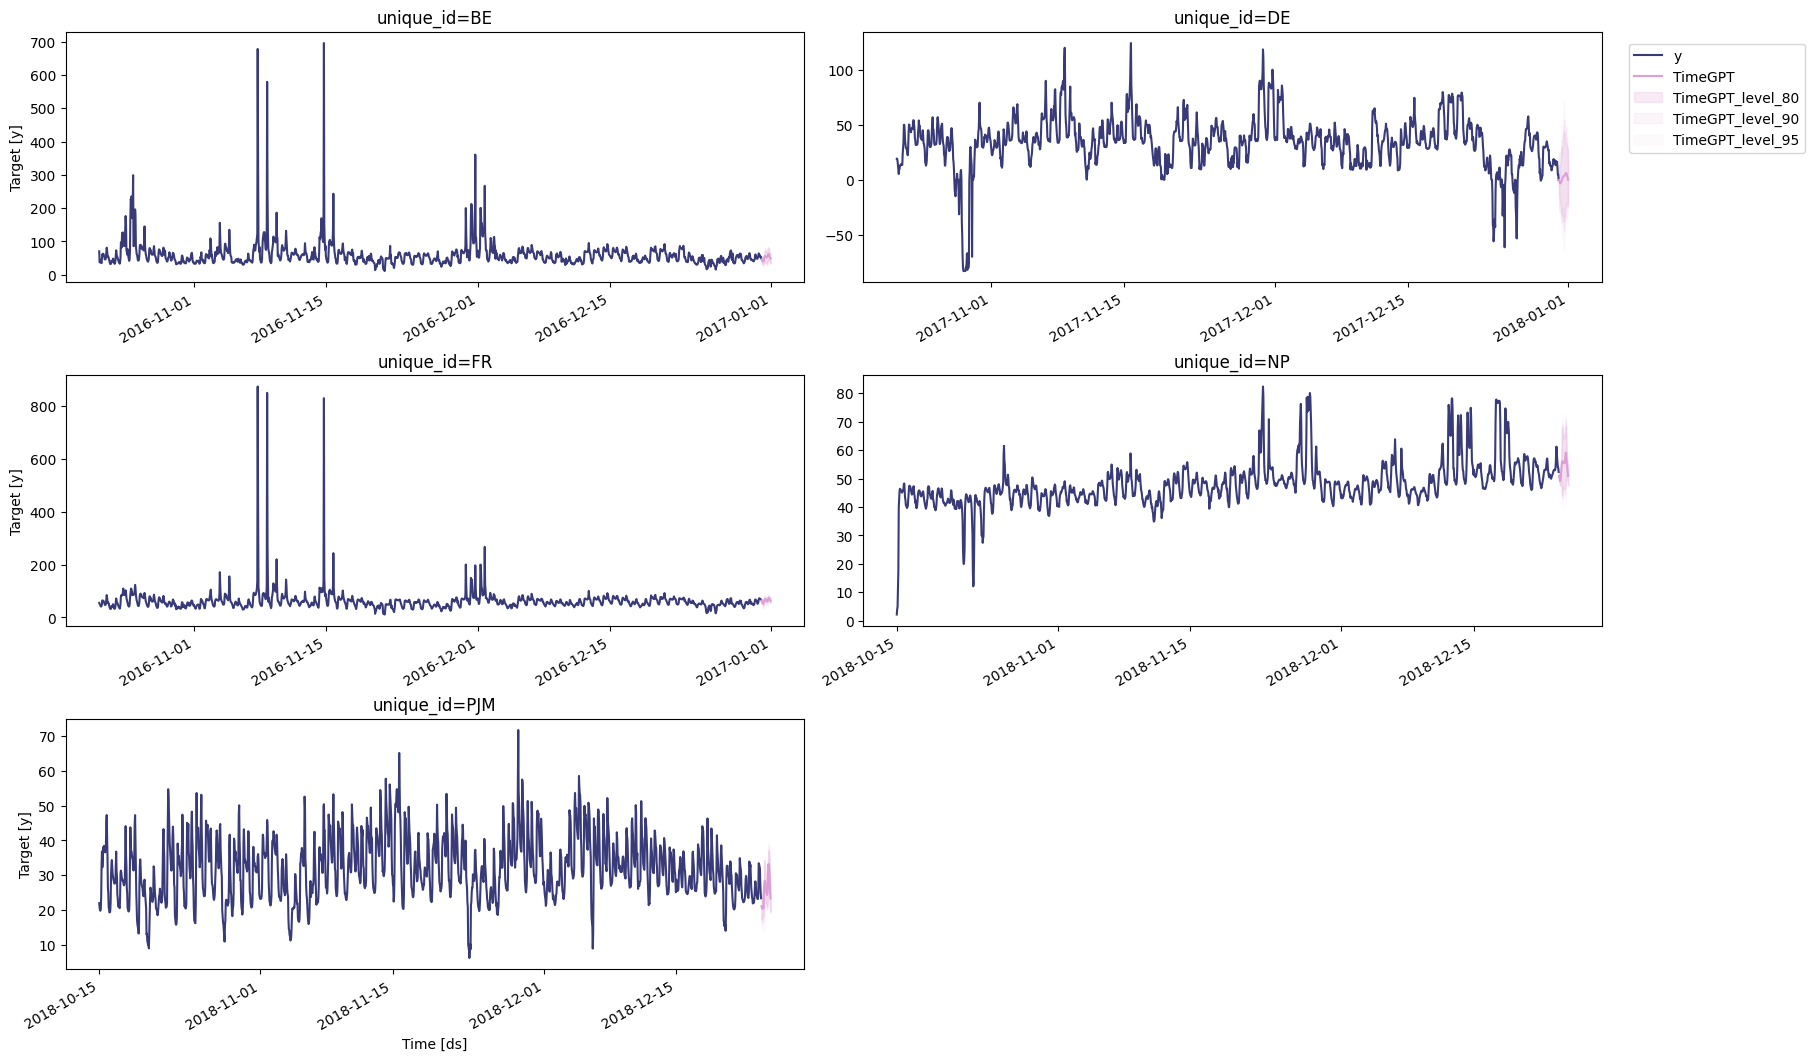

In [22]:
# 4. Plot your results (optional)
nixtla_client.plot(df, fcst_df, level=[80, 90, 95])

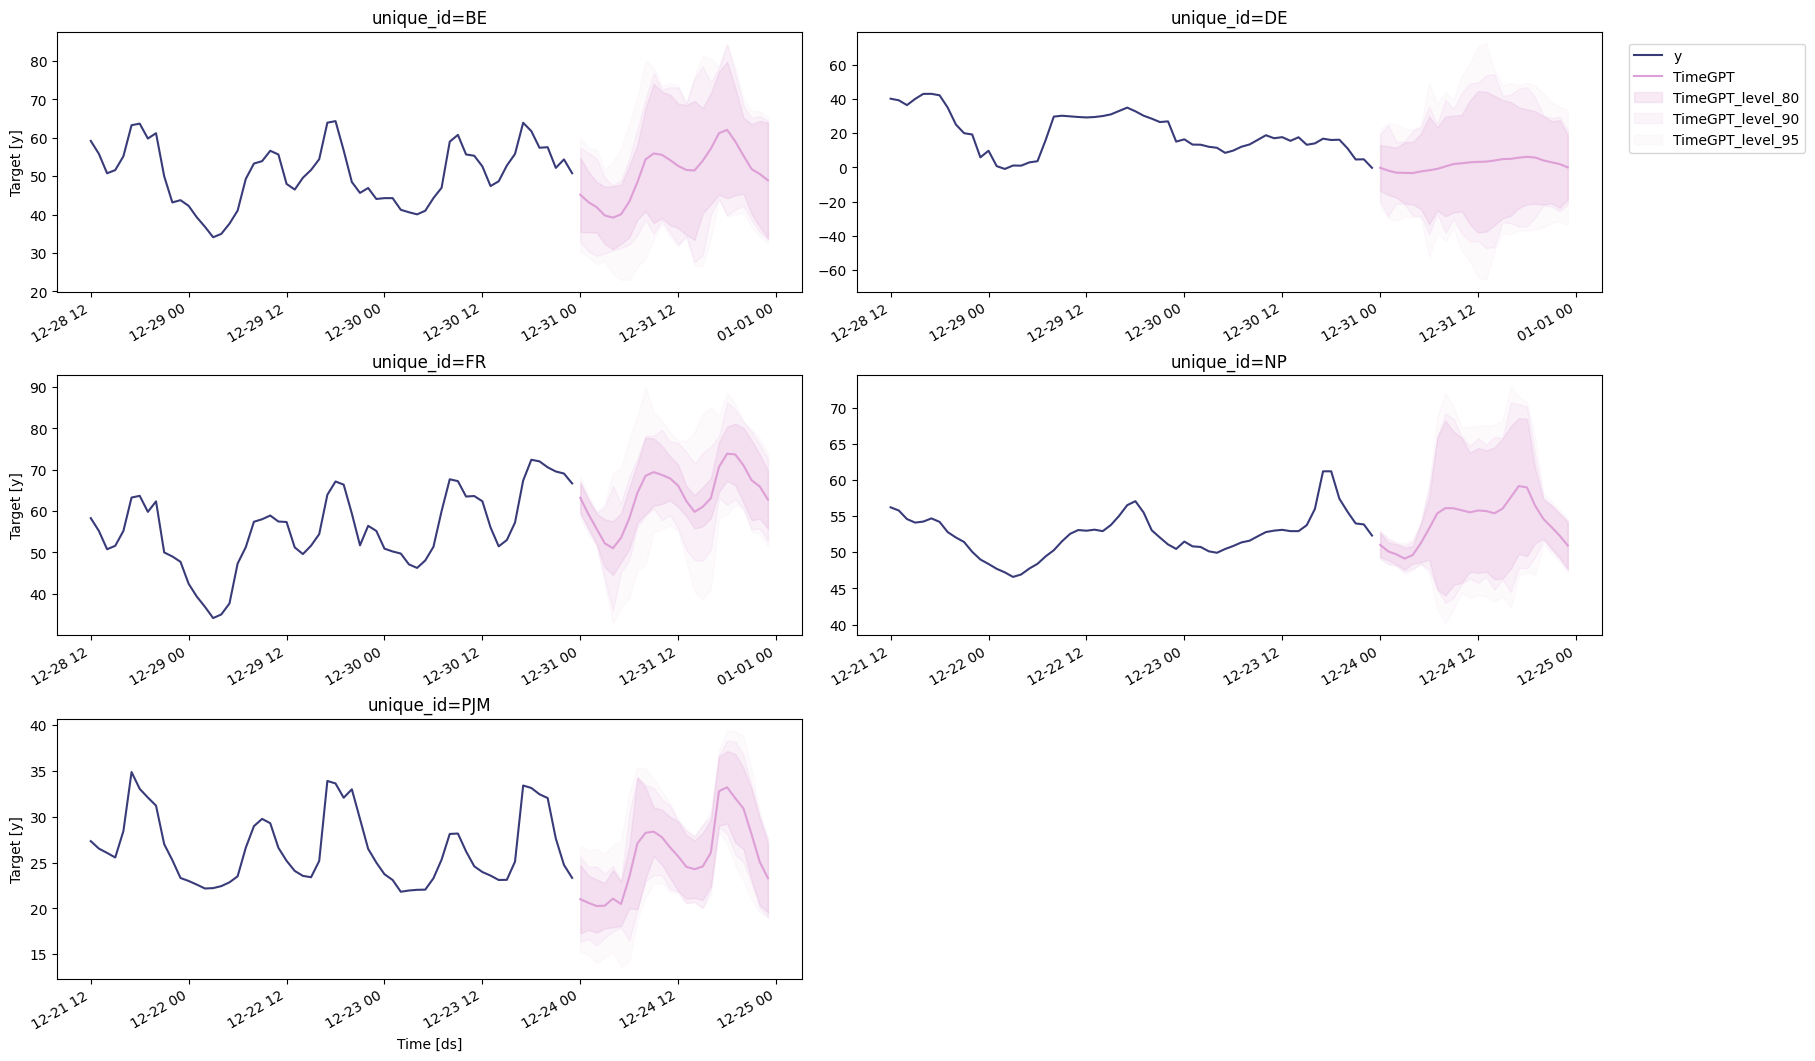

In [26]:
nixtla_client.plot(df, fcst_df, level=[80, 90, 95], max_insample_length=60)

#### TimeGPT

In [ ]:
import os
import pandas as pd
from nixtlats import TimeGPT
#from src.utils import plot

timegpt = TimeGPT(os.environ['TIMEGPT_TOKEN'])

#Load historical data
historic_df = pd.read_csv('electricity.csv')

#Predict the future
forecast_df = timegpt.forecast(historic_df, h = 24)

#Visualize
#plot(historic_df, forecast_df)

In [ ]:
from nixtlats import TimeGPT

timegpt = TimeGPT(token='nixtla-tok-kBaAOIBEprApGiouqPaDWOXVoedcnK24VbizErEORaRlVNppXdsR5HHnfB9F7ZTWjEXalsVNx27YKPSk')
future = timegpt.forecast(historic_df, 
                          h = 24,
                          level=[80, 90, 95],
                          add_history = True)

#Visualize
#plot(historic_df, forecast_df, add_history)